Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.5416 - accuracy: 0.8037 - val_loss: 0.3897 - val_accuracy: 0.8642
Epoch 2/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.3842 - accuracy: 0.8620 - val_loss: 0.3427 - val_accuracy: 0.8787
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3433 - accuracy: 0.8762 - val_loss: 0.3119 - val_accuracy: 0.8890
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3171 - accuracy: 0.8851 - val_loss: 0.3074 - val_accuracy: 0.8907
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3049 - accuracy: 0.8888 - val_loss: 0.3058 - val_accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2932 - accuracy: 0.8929 - val_loss: 0.2910 - val_accuracy: 0.8936
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2805 - accuracy: 0.8991 - val_loss: 0.2807 -

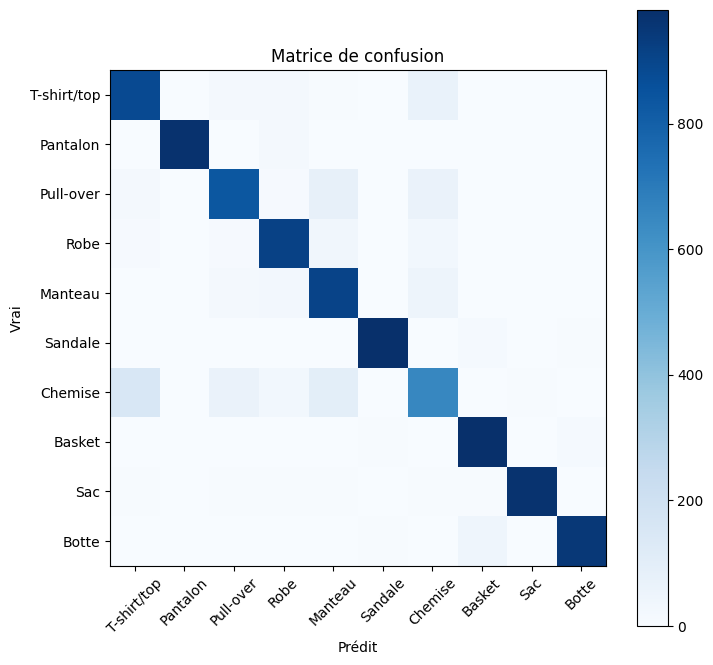

Précision: 0.904
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1

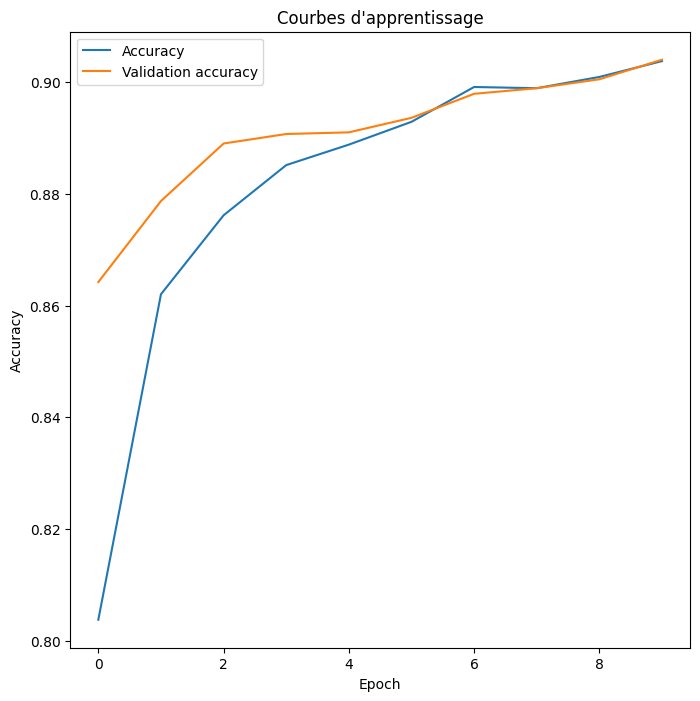

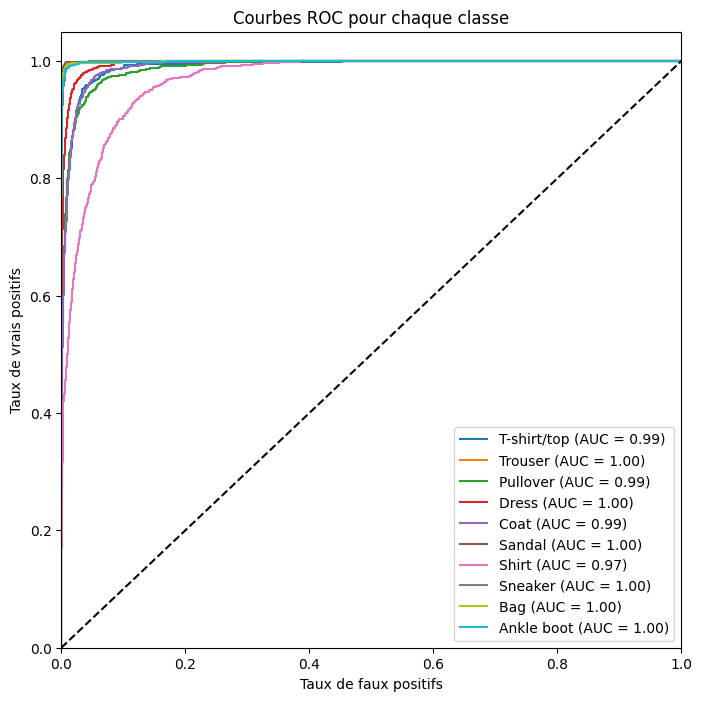

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

# Charger les données Fashion-MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Prétraiter les données
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Construire le modèle CNN
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28)),
        layers.Reshape(target_shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

# Compiler le modèle
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entraîner le modèle
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Évaluer le modèle
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['T-shirt/top', 'Pantalon', 'Pull-over', 'Robe', 'Manteau', 'Sandale', 'Chemise', 'Basket', 'Sac', 'Botte'], rotation=45)
plt.yticks(tick_marks, ['T-shirt/top', 'Pantalon', 'Pull-over', 'Robe', 'Manteau', 'Sandale', 'Chemise', 'Basket', 'Sac', 'Botte'])
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

# Précision
accuracy = accuracy_score(y_test, y_pred_classes)
print('Précision:', accuracy)

# Afficher la variable explicative du modèle
model.summary()

# Afficher les courbes d'apprentissage
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Courbes d\'apprentissage')
plt.legend()
plt.show()

# Calculer l'AUC et la courbe ROC pour chaque classe
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Afficher les courbes ROC
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='%s (AUC = %0.2f)' % (class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC pour chaque classe')
plt.legend(loc="lower right")
plt.show()
model.save('fashion_model.h5')
